# LodeSTAR particle shape test

This document is used to test segmentation performance of different datasets. Additional plots for variations between runs and segmentation performance are at the end.

## Load data

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

# Create a custom dataset class to make it compatible with the DataLoader
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Load circle
dataset = torch.load('data/dataset_C.pt')
test_dataset_C = dataset['test']
train_dataset_C = dataset['train']
test_dataloader_C = DataLoader(test_dataset_C, batch_size=8, shuffle=False)
train_dataloader_C = DataLoader(train_dataset_C, batch_size=8, shuffle=True)

# Load ellipse
dataset = torch.load('data/dataset_E.pt')
test_dataset_E = dataset['test']
train_dataset_E = dataset['train']
test_dataloader_E = DataLoader(test_dataset_E, batch_size=8, shuffle=False)
train_dataloader_E = DataLoader(train_dataset_E, batch_size=8, shuffle=True)

# Load moon
dataset = torch.load('data/dataset_M.pt')
test_dataset_M = dataset['test']
train_dataset_M = dataset['train']
test_dataloader_M = DataLoader(test_dataset_M, batch_size=8, shuffle=False)
train_dataloader_M = DataLoader(train_dataset_M, batch_size=8, shuffle=True)

# Load star
dataset = torch.load('data/dataset_S.pt')
test_dataset_S = dataset['test']
train_dataset_S = dataset['train']
test_dataloader_S = DataLoader(test_dataset_S, batch_size=8, shuffle=False)
train_dataloader_S = DataLoader(train_dataset_S, batch_size=8, shuffle=True)

# Load filament
dataset = torch.load('data/dataset_F.pt')
test_dataset_F = dataset['test']
train_dataset_F = dataset['train']
test_dataloader_F = DataLoader(test_dataset_F, batch_size=8, shuffle=False)
train_dataloader_F = DataLoader(train_dataset_F, batch_size=8, shuffle=True)

# Load square
dataset = torch.load('data/dataset_Sq.pt')
test_dataset_Sq = dataset['test']
train_dataset_Sq = dataset['train']
test_dataloader_Sq = DataLoader(test_dataset_Sq, batch_size=8, shuffle=False)
train_dataloader_Sq = DataLoader(train_dataset_Sq, batch_size=8, shuffle=True)

# Load CE
dataset = torch.load('data/dataset_CE.pt')
train_dataset_CE = dataset['train']
test_dataset_CE = dataset['test']
train_dataloader_CE = DataLoader(train_dataset_CE, batch_size=8, shuffle=True)
test_dataloader_CE = DataLoader(test_dataset_CE, batch_size=8, shuffle=False)

# Load CM
dataset = torch.load('data/dataset_CM.pt')
train_dataset_CM = dataset['train']
test_dataset_CM = dataset['test']
train_dataloader_CM = DataLoader(train_dataset_CM, batch_size=8, shuffle=True)
test_dataloader_CM = DataLoader(test_dataset_CM, batch_size=8, shuffle=False)

# Load CS
dataset = torch.load('data/dataset_CS.pt')
train_dataset_CS = dataset['train']
test_dataset_CS = dataset['test']
train_dataloader_CS = DataLoader(train_dataset_CS, batch_size=8, shuffle=True)
test_dataloader_CS = DataLoader(test_dataset_CS, batch_size=8, shuffle=False)

# Load CF
dataset = torch.load('data/dataset_CF.pt')
train_dataset_CF = dataset['train']
test_dataset_CF = dataset['test']
train_dataloader_CF = DataLoader(train_dataset_CF, batch_size=8, shuffle=True)
test_dataloader_CF = DataLoader(test_dataset_CF, batch_size=8, shuffle=False)

# Load CSq
dataset = torch.load('data/dataset_CSq.pt')
train_dataset_CSq = dataset['train']
test_dataset_CSq = dataset['test']
train_dataloader_CSq = DataLoader(train_dataset_CSq, batch_size=8, shuffle=True)
test_dataloader_CSq = DataLoader(test_dataset_CSq, batch_size=8, shuffle=False)

# Load ESq
dataset = torch.load('data/dataset_ESq.pt')
train_dataset_ESq = dataset['train']
test_dataset_ESq = dataset['test']
train_dataloader_ESq = DataLoader(train_dataset_ESq, batch_size=8, shuffle=True)
test_dataloader_ESq = DataLoader(test_dataset_ESq, batch_size=8, shuffle=False)

# Load CEM
dataset = torch.load('data/dataset_CEM.pt')
train_dataset_CEM = dataset['train']
test_dataset_CEM = dataset['test']
train_dataloader_CEM = DataLoader(train_dataset_CEM, batch_size=8, shuffle=True)
test_dataloader_CEM = DataLoader(test_dataset_CEM, batch_size=8, shuffle=False)

# Load CES
dataset = torch.load('data/dataset_CES.pt')
train_dataset_CES = dataset['train']
test_dataset_CES = dataset['test']
train_dataloader_CES = DataLoader(train_dataset_CES, batch_size=8, shuffle=True)
test_dataloader_CES = DataLoader(test_dataset_CES, batch_size=8, shuffle=False)

# Load CEF
dataset = torch.load('data/dataset_CEF.pt')
train_dataset_CEF = dataset['train']
test_dataset_CEF = dataset['test']
train_dataloader_CEF = DataLoader(train_dataset_CEF, batch_size=8, shuffle=True)
test_dataloader_CEF = DataLoader(test_dataset_CEF, batch_size=8, shuffle=False)

# Load CESq
dataset = torch.load('data/dataset_CESq.pt')
train_dataset_CESq = dataset['train']
test_dataset_CESq = dataset['test']
train_dataloader_CESq = DataLoader(train_dataset_CESq, batch_size=8, shuffle=True)
test_dataloader_CESq = DataLoader(test_dataset_CESq, batch_size=8, shuffle=False)

# Load dense
test_dataset_CE_d = torch.load('data/dataset_CE_dense.pt')
test_dataloader_CE_d = DataLoader(test_dataset_CE_d, batch_size=8, shuffle=False)

In [2]:
def adjust_learning_rate(optimizer, epoch, initial_lr, milestones, gamma):
    lr = initial_lr
    for milestone in milestones:
        if epoch >= milestone:
            lr *= gamma
        else:
            break
    optimizer.lr = lr 
    return lr

## Load model (LodeSTAR 2.8) and functions

In [4]:
import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from LodeSTAR2_8_loss import LodeSTAR
from functions.clip_grad_training import clip_grad_training
from functions.segmentation_tests import segmentation_tests

## 1 particle

### Circle particle

In [5]:
import deeplay as dl
# from clip_grad_training import clip_grad_training

# lodestar2_C = LodeSTAR(num_classes=1, n_transforms=2).build()
# lodestar2_C = clip_grad_training(lodestar2_C, train_dataloader_C, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_C.plot_losses()

lodestar2_C = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=1).build()
lodestar2_C.load_state_dict(torch.load('models/lodestar2_C.pth'))
lodestar2_C.eval()

LodeSTAR(
  (model): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): LazyConv2d(0, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (1): Conv2dBlock(
        (layer): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (2): Conv2dBlock(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (3-8): 6 x Conv2dBlock(
        (layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (9): Conv2dBlock(
        (layer): Conv2d(64, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): Identity()
      )
    )
  )
  (between_loss): L1Loss()
  (within_loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.0001)
  (

In [6]:
outputs_C = []
for batch in test_dataloader_C:
    data, part1, pos1 = batch
    output = lodestar2_C((data)).detach()
    outputs_C.append(output)

outputs_C = torch.cat(outputs_C, dim=0)

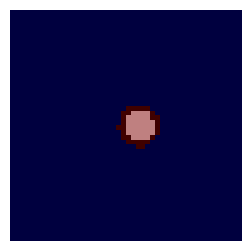

Class 1:
Jaccard Index: 0.5083
True positives %: 100%
False positives: 0.01


In [7]:
segmentation_tests(test_dataset_C, outputs_C)

### Ellipse particle

In [ ]:
lodestar2_E = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_E = clip_grad_training(lodestar2_E, train_dataloader_E, 
                                           num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_E.eval()

NameError: name 'clip_grad_training' is not defined

In [ ]:
outputs_E = []
for batch in test_dataloader_E:
    data, part1, pos1 = batch
    output = lodestar2_E((data)).detach()
    outputs_E.append(output)

outputs_E = torch.cat(outputs_E, dim=0)

segmentation_tests(test_dataset_E, outputs_E)

### Moon particle

In [ ]:
lodestar2_M = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_M = clip_grad_training(lodestar2_M, train_dataloader_M, 
                                           num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_M.plot_losses()
lodestar2_M.eval()

In [ ]:
outputs_M = []
for batch in test_dataloader_M:
    data, part1, pos1 = batch
    output = lodestar2_M((data)).detach()
    outputs_M.append(output)

outputs_M = torch.cat(outputs_M, dim=0)

segmentation_tests(test_dataset_M, outputs_M)

### Star particle

In [ ]:
lodestar2_S = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_S = clip_grad_training(lodestar2_S, train_dataloader_S, 
                                           num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_S.plot_losses()
lodestar2_S.eval()

In [ ]:
outputs_S = []
for batch in test_dataloader_S:
    data, part1, pos1 = batch
    output = lodestar2_S((data)).detach()
    outputs_S.append(output)

outputs_S = torch.cat(outputs_S, dim=0)

segmentation_tests(test_dataset_S, outputs_S)

### Filament shape

In [ ]:
lodestar2_F = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_F = clip_grad_training(lodestar2_F, train_dataloader_F, 
                                           num_epochs=50, initial_lr=2e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_F.plot_losses()
lodestar2_F.eval()

In [ ]:
outputs_F = []
for batch in test_dataloader_F:
    data, part1, pos1 = batch
    output = lodestar2_F((data)).detach()
    outputs_F.append(output)

outputs_F = torch.cat(outputs_F, dim=0)

segmentation_tests(test_dataset_F, outputs_F)

### Square shape

In [ ]:
lodestar2_Sq = LodeSTAR(num_classes=1, n_transforms=2).build()
lodestar2_Sq = clip_grad_training(lodestar2_Sq, train_dataloader_Sq, 
                                           num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

lodestar2_Sq.plot_losses()
lodestar2_Sq.eval()

In [ ]:
outputs_Sq = []
for batch in test_dataloader_Sq:
    data, part1, pos1 = batch
    output = lodestar2_Sq((data)).detach()
    outputs_Sq.append(output)

outputs_Sq = torch.cat(outputs_Sq, dim=0)

segmentation_tests(test_dataset_Sq, outputs_Sq)

## 2 classes

### CE

In [134]:
import deeplay as dl

# lodestar2_CE = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CE = dl.Trainer(max_epochs=50, accelerator='cpu')
# trainer_lodestar_CE.fit(lodestar2_CE, train_dataloader_CE)

# torch.save(lodestar2_CE.state_dict(), "models/lodestar2_CE.pth")

lodestar2_CE = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CE.load_state_dict(torch.load('models/lodestar2_CE.pth'))
lodestar2_CE.eval()

Epoch 1/39: 100%|██████████| 25/25 [00:03<00:00,  7.87it/s, loss=3.98]


Epoch 1/39, Learning Rate: 0.001800, Average Loss: 4.1135
  between_image_disagreement: 1.2551
  within_image_disagreement: 0.3311
  mask_loss: 2.3901


Epoch 2/39: 100%|██████████| 25/25 [00:02<00:00,  8.44it/s, loss=2.52]


Epoch 2/39, Learning Rate: 0.001620, Average Loss: 2.6017
  between_image_disagreement: 1.3216
  within_image_disagreement: 0.2911
  mask_loss: 0.9106


Epoch 3/39: 100%|██████████| 25/25 [00:02<00:00,  9.21it/s, loss=2.12]


Epoch 3/39, Learning Rate: 0.001458, Average Loss: 2.3155
  between_image_disagreement: 0.8506
  within_image_disagreement: 0.2206
  mask_loss: 1.0522


Epoch 4/39: 100%|██████████| 25/25 [00:03<00:00,  7.78it/s, loss=1.62]


Epoch 4/39, Learning Rate: 0.001312, Average Loss: 2.1250
  between_image_disagreement: 0.6397
  within_image_disagreement: 0.1935
  mask_loss: 0.7861


Epoch 5/39: 100%|██████████| 25/25 [00:03<00:00,  8.07it/s, loss=2.54]


Epoch 5/39, Learning Rate: 0.001181, Average Loss: 2.0320
  between_image_disagreement: 0.7895
  within_image_disagreement: 0.2195
  mask_loss: 1.5308


Epoch 6/39: 100%|██████████| 25/25 [00:04<00:00,  5.91it/s, loss=1.58]


Epoch 6/39, Learning Rate: 0.001063, Average Loss: 1.6669
  between_image_disagreement: 0.5715
  within_image_disagreement: 0.1471
  mask_loss: 0.8569


Epoch 7/39: 100%|██████████| 25/25 [00:03<00:00,  6.39it/s, loss=1.14]


Epoch 7/39, Learning Rate: 0.000957, Average Loss: 1.4162
  between_image_disagreement: 0.5784
  within_image_disagreement: 0.2522
  mask_loss: 0.3076


Epoch 8/39: 100%|██████████| 25/25 [00:05<00:00,  4.21it/s, loss=1.61]


Epoch 8/39, Learning Rate: 0.000861, Average Loss: 1.4609
  between_image_disagreement: 0.9964
  within_image_disagreement: 0.2476
  mask_loss: 0.3613


Epoch 9/39: 100%|██████████| 25/25 [00:03<00:00,  6.61it/s, loss=1.43]


Epoch 9/39, Learning Rate: 0.000775, Average Loss: 1.2666
  between_image_disagreement: 1.1286
  within_image_disagreement: 0.2922
  mask_loss: 0.0073


Epoch 10/39: 100%|██████████| 25/25 [00:03<00:00,  6.44it/s, loss=1.27] 


Epoch 10/39, Learning Rate: 0.000697, Average Loss: 1.2644
  between_image_disagreement: 0.5511
  within_image_disagreement: 0.1732
  mask_loss: 0.5420


Epoch 11/39: 100%|██████████| 25/25 [00:03<00:00,  6.49it/s, loss=1.4]  


Epoch 11/39, Learning Rate: 0.000628, Average Loss: 1.0763
  between_image_disagreement: 1.2110
  within_image_disagreement: 0.1607
  mask_loss: 0.0317


Epoch 12/39: 100%|██████████| 25/25 [00:03<00:00,  6.28it/s, loss=0.59] 


Epoch 12/39, Learning Rate: 0.000565, Average Loss: 0.8124
  between_image_disagreement: 0.3852
  within_image_disagreement: 0.1460
  mask_loss: 0.0586


Epoch 13/39: 100%|██████████| 25/25 [00:05<00:00,  4.87it/s, loss=0.328]


Epoch 13/39, Learning Rate: 0.000508, Average Loss: 0.5139
  between_image_disagreement: 0.2267
  within_image_disagreement: 0.0988
  mask_loss: 0.0024


Epoch 14/39: 100%|██████████| 25/25 [00:03<00:00,  7.26it/s, loss=0.33] 


Epoch 14/39, Learning Rate: 0.000458, Average Loss: 0.4119
  between_image_disagreement: 0.2419
  within_image_disagreement: 0.0857
  mask_loss: 0.0024


Epoch 15/39: 100%|██████████| 25/25 [00:04<00:00,  5.85it/s, loss=0.333]


Epoch 15/39, Learning Rate: 0.000412, Average Loss: 0.3863
  between_image_disagreement: 0.2423
  within_image_disagreement: 0.0812
  mask_loss: 0.0098


Epoch 16/39: 100%|██████████| 25/25 [00:03<00:00,  7.47it/s, loss=0.335]


Epoch 16/39, Learning Rate: 0.000371, Average Loss: 0.3414
  between_image_disagreement: 0.2504
  within_image_disagreement: 0.0847
  mask_loss: 0.0000


Epoch 17/39: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s, loss=0.249]


Epoch 17/39, Learning Rate: 0.000334, Average Loss: 0.2721
  between_image_disagreement: 0.1846
  within_image_disagreement: 0.0620
  mask_loss: 0.0024


Epoch 18/39: 100%|██████████| 25/25 [00:03<00:00,  7.80it/s, loss=0.383]


Epoch 18/39, Learning Rate: 0.000300, Average Loss: 0.2571
  between_image_disagreement: 0.3187
  within_image_disagreement: 0.0599
  mask_loss: 0.0049


Epoch 19/39: 100%|██████████| 25/25 [00:03<00:00,  7.85it/s, loss=0.156]


Epoch 19/39, Learning Rate: 0.000270, Average Loss: 0.2518
  between_image_disagreement: 0.1092
  within_image_disagreement: 0.0448
  mask_loss: 0.0024


Epoch 20/39: 100%|██████████| 25/25 [00:03<00:00,  8.03it/s, loss=0.424]


Epoch 20/39, Learning Rate: 0.000243, Average Loss: 0.2737
  between_image_disagreement: 0.3386
  within_image_disagreement: 0.0852
  mask_loss: 0.0000


Epoch 21/39: 100%|██████████| 25/25 [00:03<00:00,  8.29it/s, loss=0.182]


Epoch 21/39, Learning Rate: 0.000219, Average Loss: 0.2555
  between_image_disagreement: 0.1294
  within_image_disagreement: 0.0500
  mask_loss: 0.0024


Epoch 22/39: 100%|██████████| 25/25 [00:03<00:00,  6.72it/s, loss=0.237]


Epoch 22/39, Learning Rate: 0.000197, Average Loss: 0.2479
  between_image_disagreement: 0.1795
  within_image_disagreement: 0.0579
  mask_loss: 0.0000


Epoch 23/39: 100%|██████████| 25/25 [00:03<00:00,  6.30it/s, loss=0.246]


Epoch 23/39, Learning Rate: 0.000177, Average Loss: 0.2180
  between_image_disagreement: 0.1854
  within_image_disagreement: 0.0601
  mask_loss: 0.0000


Epoch 24/39: 100%|██████████| 25/25 [00:03<00:00,  6.98it/s, loss=0.247] 


Epoch 24/39, Learning Rate: 0.000160, Average Loss: 0.2022
  between_image_disagreement: 0.1876
  within_image_disagreement: 0.0598
  mask_loss: 0.0000


Epoch 25/39: 100%|██████████| 25/25 [00:03<00:00,  8.24it/s, loss=0.4]  


Epoch 25/39, Learning Rate: 0.000144, Average Loss: 0.2015
  between_image_disagreement: 0.3377
  within_image_disagreement: 0.0627
  mask_loss: 0.0000


Epoch 26/39: 100%|██████████| 25/25 [00:02<00:00,  8.34it/s, loss=0.17] 


Epoch 26/39, Learning Rate: 0.000129, Average Loss: 0.1838
  between_image_disagreement: 0.1278
  within_image_disagreement: 0.0427
  mask_loss: 0.0000


Epoch 27/39: 100%|██████████| 25/25 [00:03<00:00,  7.94it/s, loss=0.0964]


Epoch 27/39, Learning Rate: 0.000116, Average Loss: 0.1843
  between_image_disagreement: 0.0681
  within_image_disagreement: 0.0258
  mask_loss: 0.0024


Epoch 28/39: 100%|██████████| 25/25 [00:03<00:00,  8.12it/s, loss=0.176] 


Epoch 28/39, Learning Rate: 0.000105, Average Loss: 0.1694
  between_image_disagreement: 0.1269
  within_image_disagreement: 0.0496
  mask_loss: 0.0000


Epoch 29/39: 100%|██████████| 25/25 [00:03<00:00,  8.08it/s, loss=0.258]


Epoch 29/39, Learning Rate: 0.000094, Average Loss: 0.1676
  between_image_disagreement: 0.2143
  within_image_disagreement: 0.0441
  mask_loss: 0.0000


Epoch 30/39: 100%|██████████| 25/25 [00:03<00:00,  8.02it/s, loss=0.192]


Epoch 30/39, Learning Rate: 0.000085, Average Loss: 0.1767
  between_image_disagreement: 0.1435
  within_image_disagreement: 0.0482
  mask_loss: 0.0000


Epoch 31/39: 100%|██████████| 25/25 [00:03<00:00,  7.45it/s, loss=0.154]


Epoch 31/39, Learning Rate: 0.000076, Average Loss: 0.1667
  between_image_disagreement: 0.1034
  within_image_disagreement: 0.0479
  mask_loss: 0.0024


Epoch 32/39: 100%|██████████| 25/25 [00:03<00:00,  7.91it/s, loss=0.112] 


Epoch 32/39, Learning Rate: 0.000069, Average Loss: 0.1781
  between_image_disagreement: 0.0767
  within_image_disagreement: 0.0353
  mask_loss: 0.0000


Epoch 33/39: 100%|██████████| 25/25 [00:03<00:00,  8.00it/s, loss=0.126] 


Epoch 33/39, Learning Rate: 0.000062, Average Loss: 0.1586
  between_image_disagreement: 0.0723
  within_image_disagreement: 0.0536
  mask_loss: 0.0000


Epoch 34/39: 100%|██████████| 25/25 [00:03<00:00,  7.95it/s, loss=0.161] 


Epoch 34/39, Learning Rate: 0.000056, Average Loss: 0.1597
  between_image_disagreement: 0.1108
  within_image_disagreement: 0.0498
  mask_loss: 0.0000


Epoch 35/39: 100%|██████████| 25/25 [00:03<00:00,  8.11it/s, loss=0.196] 


Epoch 35/39, Learning Rate: 0.000050, Average Loss: 0.1537
  between_image_disagreement: 0.1537
  within_image_disagreement: 0.0397
  mask_loss: 0.0024


Epoch 36/39: 100%|██████████| 25/25 [00:03<00:00,  8.00it/s, loss=0.148] 


Epoch 36/39, Learning Rate: 0.000045, Average Loss: 0.1631
  between_image_disagreement: 0.0989
  within_image_disagreement: 0.0494
  mask_loss: 0.0000


Epoch 37/39: 100%|██████████| 25/25 [00:03<00:00,  8.05it/s, loss=0.154] 


Epoch 37/39, Learning Rate: 0.000041, Average Loss: 0.1524
  between_image_disagreement: 0.1143
  within_image_disagreement: 0.0400
  mask_loss: 0.0000


Epoch 38/39: 100%|██████████| 25/25 [00:03<00:00,  8.07it/s, loss=0.132] 


Epoch 38/39, Learning Rate: 0.000036, Average Loss: 0.1438
  between_image_disagreement: 0.1029
  within_image_disagreement: 0.0293
  mask_loss: 0.0000


Epoch 39/39: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s, loss=0.228] 


Epoch 39/39, Learning Rate: 0.000033, Average Loss: 0.1544
  between_image_disagreement: 0.1872
  within_image_disagreement: 0.0403
  mask_loss: 0.0000


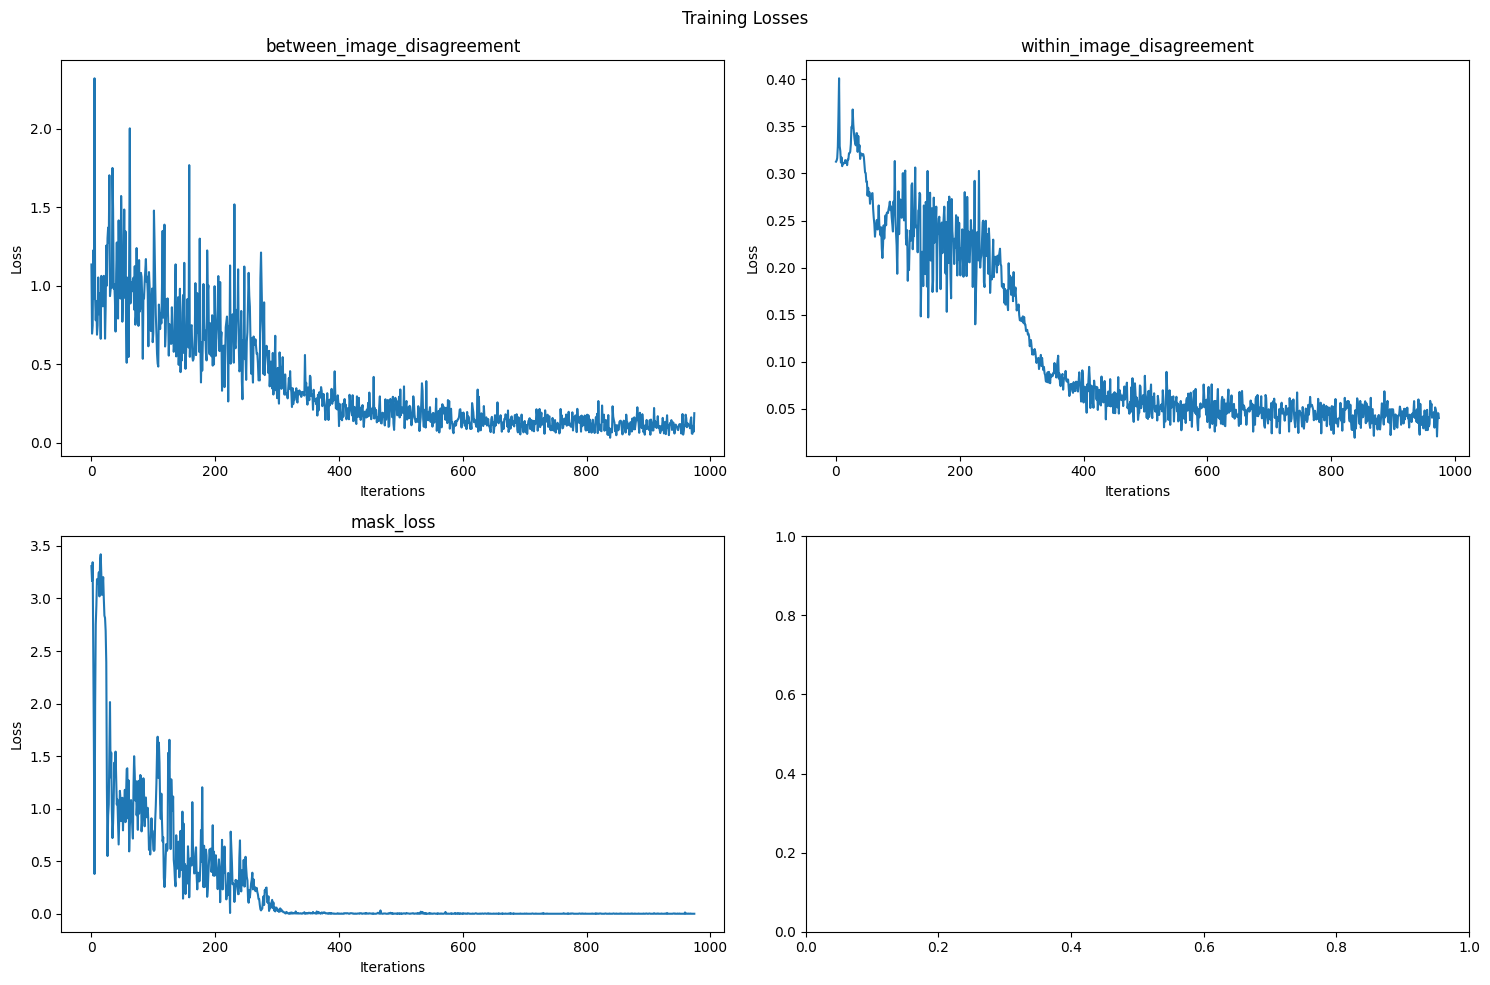

In [131]:
# lodestar2_CE = LodeSTAR(num_classes=2, n_transforms=2).build()
# lodestar2_CE = clip_grad_training(lodestar2_CE, train_dataloader_CE, 
#                                            num_epochs=39, initial_lr=2e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_CE.plot_losses()

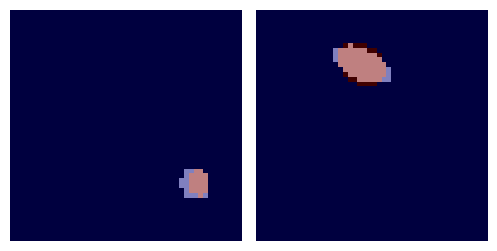

Class 1:
Jaccard Index: 0.6201
True positives %: 99%
False positives: 0.01
Class 2:
Jaccard Index: 0.7173
True positives %: 99%
False positives: 0.01


In [132]:
lodestar2_CE.eval()

outputs_CE = []
for batch in test_dataloader_CE:
    data, *_ = batch
    output = lodestar2_CE((data)).detach()
    outputs_CE.append(output)

outputs_CE = torch.cat(outputs_CE, dim=0)

segmentation_tests(test_dataset_CE, outputs_CE)

### CM

In [ ]:
import deeplay as dl

# lodestar2_CM = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CM = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CM.fit(lodestar2_CM, train_dataloader_CM)

# torch.save(lodestar2_CM.state_dict(), "models/lodestar2_CM.pth")

lodestar2_CM = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CM.load_state_dict(torch.load('models/lodestar2_CM.pth'))
lodestar2_CM.eval()

In [ ]:
# lodestar2_CM = LodeSTAR(num_classes=2, n_transforms=2).build()
# lodestar2_CM = clip_grad_training(lodestar2_CM, train_dataloader_CM, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, gamma =0.9, best_model=False, clip_grad=False)

# lodestar2_CM.plot_losses()

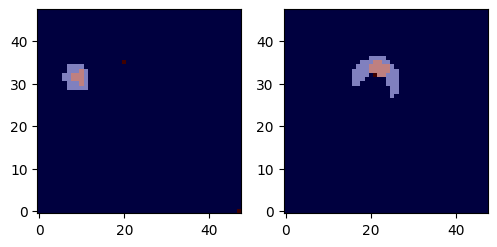

Class 1:
Jaccard Index: 0.2707
True positives %: 92%
False positives: 1.15
Class 2:
Jaccard Index: 0.2400
True positives %: 97%
False positives: 0.07


In [ ]:
outputs_CM = []
for batch in test_dataloader_CM:
    data, *_ = batch
    output = lodestar2_CM((data)).detach()
    outputs_CM.append(output)

outputs_CM = torch.cat(outputs_CM, dim=0)

segmentation_tests(test_dataset_CM, outputs_CM)

### CS

In [ ]:
import deeplay as dl

# lodestar2_CS = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CS = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CS.fit(lodestar2_CS, train_dataloader_CS)

# torch.save(lodestar2_CS.state_dict(), "models/lodestar2_CS.pth")

lodestar2_CS = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CS.load_state_dict(torch.load('models/lodestar2_CS.pth'))
lodestar2_CS.eval()

In [ ]:
# lodestar2_CS = LodeSTAR(num_classes=2, n_transforms=2).build()
# lodestar2_CS = clip_grad_training(lodestar2_CS, train_dataloader_CS, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_CS.plot_losses()

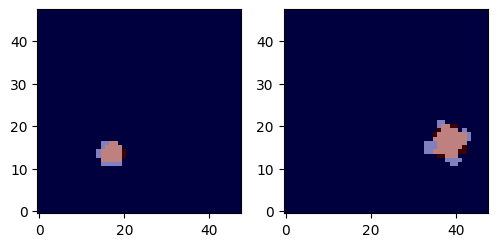

Class 1:
Jaccard Index: 0.6732
True positives %: 95%
False positives: 0.04
Class 2:
Jaccard Index: 0.5342
True positives %: 99%
False positives: 0.13


In [ ]:
outputs_CS = []
for batch in test_dataloader_CS:
    data, *_ = batch
    output = lodestar2_CS((data)).detach()
    outputs_CS.append(output)

outputs_CS = torch.cat(outputs_CS, dim=0)

segmentation_tests(test_dataset_CS, outputs_CS)

### CF

In [ ]:
import deeplay as dl

# lodestar2_CF = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CF = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CF.fit(lodestar2_CF, train_dataloader_CF)

# torch.save(lodestar2_CF.state_dict(), "models/lodestar2_CF.pth")

lodestar2_CF = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CF.load_state_dict(torch.load('models/lodestar2_CF.pth'))
lodestar2_CF.eval()

In [ ]:
# lodestar2_CF = LodeSTAR(num_classes=2, n_transforms=2).build()
# lodestar2_CF = clip_grad_training(lodestar2_CF, train_dataloader_CF, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_CF.plot_losses()

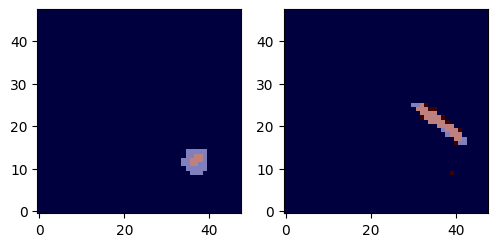

Class 1:
Jaccard Index: 0.2173
True positives %: 97%
False positives: 0.03
Class 2:
Jaccard Index: 0.6546
True positives %: 100%
False positives: 0.57


In [ ]:
outputs_CF = []
for batch in test_dataloader_CF:
    data, *_ = batch
    output = lodestar2_CF((data)).detach()
    outputs_CF.append(output)

outputs_CF = torch.cat(outputs_CF, dim=0)

segmentation_tests(test_dataset_CF, outputs_CF)

### CSq

In [ ]:
import deeplay as dl

# lodestar2_CSq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CSq = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CSq.fit(lodestar2_CSq, train_dataloader_CSq)

# torch.save(lodestar2_CSq.state_dict(), "models/lodestar2_CSq.pth")

lodestar2_CSq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CSq.load_state_dict(torch.load('models/lodestar2_CSq.pth'))
lodestar2_CSq.eval()

In [ ]:
# lodestar2_CSq = LodeSTAR(num_classes=2, n_transforms=2).build()
# lodestar2_CSq = clip_grad_training(lodestar2_CSq, train_dataloader_CSq, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_CSq.plot_losses()# from clip_grad_tr

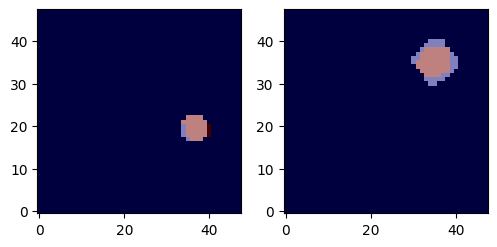

Class 1:
Jaccard Index: 0.6903
True positives %: 91%
False positives: 0.15
Class 2:
Jaccard Index: 0.5819
True positives %: 100%
False positives: 0.1


In [ ]:
outputs_CSq = []
for batch in test_dataloader_CSq:
    data, *_ = batch
    output = lodestar2_CSq((data)).detach()
    outputs_CSq.append(output)

outputs_CSq = torch.cat(outputs_CSq, dim=0)

segmentation_tests(test_dataset_CSq, outputs_CSq)

### ESq

In [ ]:
import deeplay as dl

lodestar2_ESq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
trainer_lodestar_ESq = dl.Trainer(max_epochs=100, accelerator='cpu')
trainer_lodestar_ESq.fit(lodestar2_ESq, train_dataloader_ESq)

# torch.save(lodestar2_ESq.state_dict(), "models/lodestar2_ESq.pth")

# lodestar2_ESq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# lodestar2_ESq.load_state_dict(torch.load('models/lodestar2_ESq.pth'))
# lodestar2_ESq.eval()

┏━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name          ┃ Type                       ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model         │ ConvolutionalNeuralNetwork │  252 K │
│ 1 │ between_loss  │ L1Loss                     │      0 │
│ 2 │ within_loss   │ L1Loss                     │      0 │
│ 3 │ train_metrics │ MetricCollection           │      0 │
│ 4 │ val_metrics   │ MetricCollection           │      0 │
│ 5 │ test_metrics  │ MetricCollection           │      0 │
│ 6 │ optimizer     │ Adam                       │      0 │
└───┴───────────────┴────────────────────────────┴────────┘

Trainable params: 252 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 252 K                                                                                                
Total estimated model params size (MB): 1

Output()

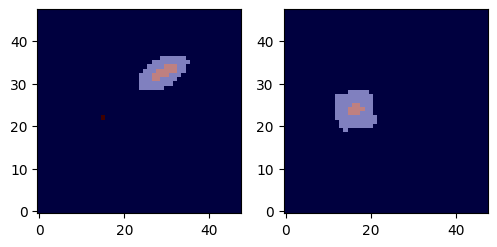

Class 1:
Jaccard Index: 0.1655
True positives %: 98%
False positives: 0.16
Class 2:
Jaccard Index: 0.1157
True positives %: 98%
False positives: 0.01


In [ ]:
from segmentation_tests import segmentation_tests

outputs_ESq = []
for batch in test_dataloader_ESq:
    data, *_ = batch
    output = lodestar2_ESq((data)).detach()
    outputs_ESq.append(output)

outputs_ESq = torch.cat(outputs_ESq, dim=0)

segmentation_tests(test_dataset_ESq, outputs_ESq)

## 3 particles

### CEM

In [25]:
# import deeplay as dl

# lodestar2_CEM = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3, n_transforms=4).build()
# trainer_lodestar_CEM = dl.Trainer(max_epochs=50, accelerator='cpu')
# trainer_lodestar_CEM.fit(lodestar2_CEM, train_dataloader_CEM)

# torch.save(lodestar2_CEM.state_dict(), "models/lodestar2_CEM.pth")

lodestar2_CEM = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
lodestar2_CEM.load_state_dict(torch.load('models/lodestar2_CEM.pth'))
lodestar2_CEM.eval()

Epoch 1/50: 100%|██████████| 38/38 [00:04<00:00,  8.81it/s, loss=2.26]


Epoch 1/50, Learning Rate: 0.000900, Average Loss: 2.6495
  between_image_disagreement: 0.9211
  within_image_disagreement: 0.3204
  mask_loss: 1.0156


Epoch 2/50: 100%|██████████| 38/38 [00:03<00:00,  9.59it/s, loss=2.16]


Epoch 2/50, Learning Rate: 0.000810, Average Loss: 2.4860
  between_image_disagreement: 0.8018
  within_image_disagreement: 0.3121
  mask_loss: 1.0430


Epoch 3/50: 100%|██████████| 38/38 [00:03<00:00, 10.38it/s, loss=2.32]


Epoch 3/50, Learning Rate: 0.000729, Average Loss: 2.1826
  between_image_disagreement: 1.2430
  within_image_disagreement: 0.2648
  mask_loss: 0.8145


Epoch 4/50: 100%|██████████| 38/38 [00:03<00:00, 10.07it/s, loss=2.31]


Epoch 4/50, Learning Rate: 0.000656, Average Loss: 1.9265
  between_image_disagreement: 0.9183
  within_image_disagreement: 0.2856
  mask_loss: 1.1094


Epoch 5/50: 100%|██████████| 38/38 [00:03<00:00,  9.96it/s, loss=1.98]


Epoch 5/50, Learning Rate: 0.000590, Average Loss: 1.9956
  between_image_disagreement: 0.9257
  within_image_disagreement: 0.2605
  mask_loss: 0.7930


Epoch 6/50: 100%|██████████| 38/38 [00:03<00:00, 10.01it/s, loss=1.45]


Epoch 6/50, Learning Rate: 0.000531, Average Loss: 1.8817
  between_image_disagreement: 0.6428
  within_image_disagreement: 0.1777
  mask_loss: 0.6309


Epoch 7/50: 100%|██████████| 38/38 [00:04<00:00,  9.35it/s, loss=2.16]


Epoch 7/50, Learning Rate: 0.000478, Average Loss: 1.8192
  between_image_disagreement: 1.1651
  within_image_disagreement: 0.2585
  mask_loss: 0.7344


Epoch 8/50: 100%|██████████| 38/38 [00:04<00:00,  9.49it/s, loss=1.21]


Epoch 8/50, Learning Rate: 0.000430, Average Loss: 1.6225
  between_image_disagreement: 0.6212
  within_image_disagreement: 0.2224
  mask_loss: 0.3633


Epoch 9/50: 100%|██████████| 38/38 [00:04<00:00,  9.33it/s, loss=1.59]


Epoch 9/50, Learning Rate: 0.000387, Average Loss: 1.6406
  between_image_disagreement: 0.7760
  within_image_disagreement: 0.1958
  mask_loss: 0.6230


Epoch 10/50: 100%|██████████| 38/38 [00:03<00:00,  9.56it/s, loss=1.69]


Epoch 10/50, Learning Rate: 0.000349, Average Loss: 1.5253
  between_image_disagreement: 0.8078
  within_image_disagreement: 0.2454
  mask_loss: 0.6387


Epoch 11/50: 100%|██████████| 38/38 [00:04<00:00,  9.23it/s, loss=1.42]


Epoch 11/50, Learning Rate: 0.000314, Average Loss: 1.5604
  between_image_disagreement: 0.7214
  within_image_disagreement: 0.1819
  mask_loss: 0.5156


Epoch 12/50: 100%|██████████| 38/38 [00:04<00:00,  9.23it/s, loss=1.36]


Epoch 12/50, Learning Rate: 0.000282, Average Loss: 1.3884
  between_image_disagreement: 0.4970
  within_image_disagreement: 0.1700
  mask_loss: 0.6934


Epoch 13/50: 100%|██████████| 38/38 [00:03<00:00,  9.53it/s, loss=0.937]


Epoch 13/50, Learning Rate: 0.000254, Average Loss: 1.2802
  between_image_disagreement: 0.5196
  within_image_disagreement: 0.1611
  mask_loss: 0.2559


Epoch 14/50: 100%|██████████| 38/38 [00:03<00:00,  9.62it/s, loss=1.44] 


Epoch 14/50, Learning Rate: 0.000229, Average Loss: 1.2337
  between_image_disagreement: 0.8918
  within_image_disagreement: 0.1081
  mask_loss: 0.4355


Epoch 15/50: 100%|██████████| 38/38 [00:04<00:00,  9.25it/s, loss=0.814]


Epoch 15/50, Learning Rate: 0.000206, Average Loss: 1.0408
  between_image_disagreement: 0.4324
  within_image_disagreement: 0.1489
  mask_loss: 0.2324


Epoch 16/50: 100%|██████████| 38/38 [00:04<00:00,  9.24it/s, loss=0.693]


Epoch 16/50, Learning Rate: 0.000185, Average Loss: 0.9485
  between_image_disagreement: 0.2975
  within_image_disagreement: 0.1141
  mask_loss: 0.2812


Epoch 17/50: 100%|██████████| 38/38 [00:04<00:00,  9.35it/s, loss=1.01] 


Epoch 17/50, Learning Rate: 0.000167, Average Loss: 0.8712
  between_image_disagreement: 0.6270
  within_image_disagreement: 0.0543
  mask_loss: 0.3320


Epoch 18/50: 100%|██████████| 38/38 [00:04<00:00,  9.14it/s, loss=0.788]


Epoch 18/50, Learning Rate: 0.000150, Average Loss: 0.8439
  between_image_disagreement: 0.4350
  within_image_disagreement: 0.0974
  mask_loss: 0.2559


Epoch 19/50: 100%|██████████| 38/38 [00:04<00:00,  9.17it/s, loss=0.712]


Epoch 19/50, Learning Rate: 0.000135, Average Loss: 0.7107
  between_image_disagreement: 0.3851
  within_image_disagreement: 0.0867
  mask_loss: 0.2402


Epoch 20/50: 100%|██████████| 38/38 [00:04<00:00,  8.72it/s, loss=0.435]


Epoch 20/50, Learning Rate: 0.000122, Average Loss: 0.6560
  between_image_disagreement: 0.1535
  within_image_disagreement: 0.0469
  mask_loss: 0.2344


Epoch 21/50: 100%|██████████| 38/38 [00:04<00:00,  8.94it/s, loss=0.824]


Epoch 21/50, Learning Rate: 0.000109, Average Loss: 0.6504
  between_image_disagreement: 0.6192
  within_image_disagreement: 0.1228
  mask_loss: 0.0820


Epoch 22/50: 100%|██████████| 38/38 [00:04<00:00,  8.67it/s, loss=0.699]


Epoch 22/50, Learning Rate: 0.000098, Average Loss: 0.5746
  between_image_disagreement: 0.5295
  within_image_disagreement: 0.1086
  mask_loss: 0.0605


Epoch 23/50: 100%|██████████| 38/38 [00:04<00:00,  8.87it/s, loss=0.447]


Epoch 23/50, Learning Rate: 0.000089, Average Loss: 0.5596
  between_image_disagreement: 0.2944
  within_image_disagreement: 0.0707
  mask_loss: 0.0820


Epoch 24/50: 100%|██████████| 38/38 [00:04<00:00,  8.58it/s, loss=0.389]


Epoch 24/50, Learning Rate: 0.000080, Average Loss: 0.5234
  between_image_disagreement: 0.2252
  within_image_disagreement: 0.0754
  mask_loss: 0.0879


Epoch 25/50: 100%|██████████| 38/38 [00:04<00:00,  8.90it/s, loss=0.485]


Epoch 25/50, Learning Rate: 0.000072, Average Loss: 0.4754
  between_image_disagreement: 0.3392
  within_image_disagreement: 0.0555
  mask_loss: 0.0898


Epoch 26/50: 100%|██████████| 38/38 [00:04<00:00,  8.64it/s, loss=0.885]


Epoch 26/50, Learning Rate: 0.000065, Average Loss: 0.4617
  between_image_disagreement: 0.7673
  within_image_disagreement: 0.1177
  mask_loss: 0.0000


Epoch 27/50: 100%|██████████| 38/38 [00:04<00:00,  8.79it/s, loss=0.637]


Epoch 27/50, Learning Rate: 0.000058, Average Loss: 0.4074
  between_image_disagreement: 0.5227
  within_image_disagreement: 0.0655
  mask_loss: 0.0488


Epoch 28/50: 100%|██████████| 38/38 [00:04<00:00,  8.76it/s, loss=0.302]


Epoch 28/50, Learning Rate: 0.000052, Average Loss: 0.4061
  between_image_disagreement: 0.1520
  within_image_disagreement: 0.0874
  mask_loss: 0.0625


Epoch 29/50: 100%|██████████| 38/38 [00:04<00:00,  8.81it/s, loss=0.262]


Epoch 29/50, Learning Rate: 0.000047, Average Loss: 0.3688
  between_image_disagreement: 0.1502
  within_image_disagreement: 0.0634
  mask_loss: 0.0488


Epoch 30/50: 100%|██████████| 38/38 [00:04<00:00,  8.66it/s, loss=0.444]


Epoch 30/50, Learning Rate: 0.000042, Average Loss: 0.3544
  between_image_disagreement: 0.3344
  within_image_disagreement: 0.0730
  mask_loss: 0.0371


Epoch 31/50: 100%|██████████| 38/38 [00:04<00:00,  8.82it/s, loss=0.383]


Epoch 31/50, Learning Rate: 0.000038, Average Loss: 0.3592
  between_image_disagreement: 0.2954
  within_image_disagreement: 0.0527
  mask_loss: 0.0352


Epoch 32/50: 100%|██████████| 38/38 [00:04<00:00,  8.71it/s, loss=0.414]


Epoch 32/50, Learning Rate: 0.000034, Average Loss: 0.3174
  between_image_disagreement: 0.3363
  within_image_disagreement: 0.0681
  mask_loss: 0.0098


Epoch 33/50: 100%|██████████| 38/38 [00:04<00:00,  8.81it/s, loss=0.278]


Epoch 33/50, Learning Rate: 0.000031, Average Loss: 0.2868
  between_image_disagreement: 0.1993
  within_image_disagreement: 0.0611
  mask_loss: 0.0176


Epoch 34/50: 100%|██████████| 38/38 [00:04<00:00,  8.66it/s, loss=0.213]


Epoch 34/50, Learning Rate: 0.000028, Average Loss: 0.2935
  between_image_disagreement: 0.1482
  within_image_disagreement: 0.0338
  mask_loss: 0.0312


Epoch 35/50: 100%|██████████| 38/38 [00:04<00:00,  8.89it/s, loss=0.226]


Epoch 35/50, Learning Rate: 0.000025, Average Loss: 0.2717
  between_image_disagreement: 0.1763
  within_image_disagreement: 0.0323
  mask_loss: 0.0176


Epoch 36/50: 100%|██████████| 38/38 [00:04<00:00,  8.05it/s, loss=0.151]


Epoch 36/50, Learning Rate: 0.000023, Average Loss: 0.2564
  between_image_disagreement: 0.0846
  within_image_disagreement: 0.0569
  mask_loss: 0.0098


Epoch 37/50: 100%|██████████| 38/38 [00:04<00:00,  8.85it/s, loss=0.277]


Epoch 37/50, Learning Rate: 0.000020, Average Loss: 0.2473
  between_image_disagreement: 0.2026
  within_image_disagreement: 0.0573
  mask_loss: 0.0176


Epoch 38/50: 100%|██████████| 38/38 [00:04<00:00,  8.47it/s, loss=0.297]


Epoch 38/50, Learning Rate: 0.000018, Average Loss: 0.2563
  between_image_disagreement: 0.2407
  within_image_disagreement: 0.0444
  mask_loss: 0.0117


Epoch 39/50: 100%|██████████| 38/38 [00:05<00:00,  7.58it/s, loss=0.353]


Epoch 39/50, Learning Rate: 0.000016, Average Loss: 0.2202
  between_image_disagreement: 0.2738
  within_image_disagreement: 0.0481
  mask_loss: 0.0312


Epoch 40/50: 100%|██████████| 38/38 [00:04<00:00,  7.95it/s, loss=0.243]


Epoch 40/50, Learning Rate: 0.000015, Average Loss: 0.2243
  between_image_disagreement: 0.1935
  within_image_disagreement: 0.0381
  mask_loss: 0.0117


Epoch 41/50: 100%|██████████| 38/38 [00:04<00:00,  9.19it/s, loss=0.136]


Epoch 41/50, Learning Rate: 0.000013, Average Loss: 0.2081
  between_image_disagreement: 0.0808
  within_image_disagreement: 0.0322
  mask_loss: 0.0234


Epoch 42/50: 100%|██████████| 38/38 [00:04<00:00,  8.59it/s, loss=0.21] 


Epoch 42/50, Learning Rate: 0.000012, Average Loss: 0.2073
  between_image_disagreement: 0.1517
  within_image_disagreement: 0.0542
  mask_loss: 0.0039


Epoch 43/50: 100%|██████████| 38/38 [00:04<00:00,  8.69it/s, loss=0.211]


Epoch 43/50, Learning Rate: 0.000011, Average Loss: 0.2151
  between_image_disagreement: 0.1618
  within_image_disagreement: 0.0412
  mask_loss: 0.0078


Epoch 44/50: 100%|██████████| 38/38 [00:04<00:00,  8.60it/s, loss=0.124]


Epoch 44/50, Learning Rate: 0.000010, Average Loss: 0.2059
  between_image_disagreement: 0.0756
  within_image_disagreement: 0.0385
  mask_loss: 0.0098


Epoch 45/50: 100%|██████████| 38/38 [00:04<00:00,  8.75it/s, loss=0.23] 


Epoch 45/50, Learning Rate: 0.000009, Average Loss: 0.2059
  between_image_disagreement: 0.1823
  within_image_disagreement: 0.0435
  mask_loss: 0.0039


Epoch 46/50: 100%|██████████| 38/38 [00:04<00:00,  8.74it/s, loss=0.216]


Epoch 46/50, Learning Rate: 0.000008, Average Loss: 0.1874
  between_image_disagreement: 0.1572
  within_image_disagreement: 0.0544
  mask_loss: 0.0039


Epoch 47/50: 100%|██████████| 38/38 [00:04<00:00,  8.86it/s, loss=0.192]


Epoch 47/50, Learning Rate: 0.000007, Average Loss: 0.1989
  between_image_disagreement: 0.1497
  within_image_disagreement: 0.0422
  mask_loss: 0.0000


Epoch 48/50: 100%|██████████| 38/38 [00:04<00:00,  8.59it/s, loss=0.157]


Epoch 48/50, Learning Rate: 0.000006, Average Loss: 0.2038
  between_image_disagreement: 0.1091
  within_image_disagreement: 0.0437
  mask_loss: 0.0039


Epoch 49/50: 100%|██████████| 38/38 [00:04<00:00,  8.74it/s, loss=0.154]


Epoch 49/50, Learning Rate: 0.000006, Average Loss: 0.1912
  between_image_disagreement: 0.1135
  within_image_disagreement: 0.0328
  mask_loss: 0.0078


Epoch 50/50: 100%|██████████| 38/38 [00:04<00:00,  8.59it/s, loss=0.129]


Epoch 50/50, Learning Rate: 0.000005, Average Loss: 0.1869
  between_image_disagreement: 0.1023
  within_image_disagreement: 0.0206
  mask_loss: 0.0059


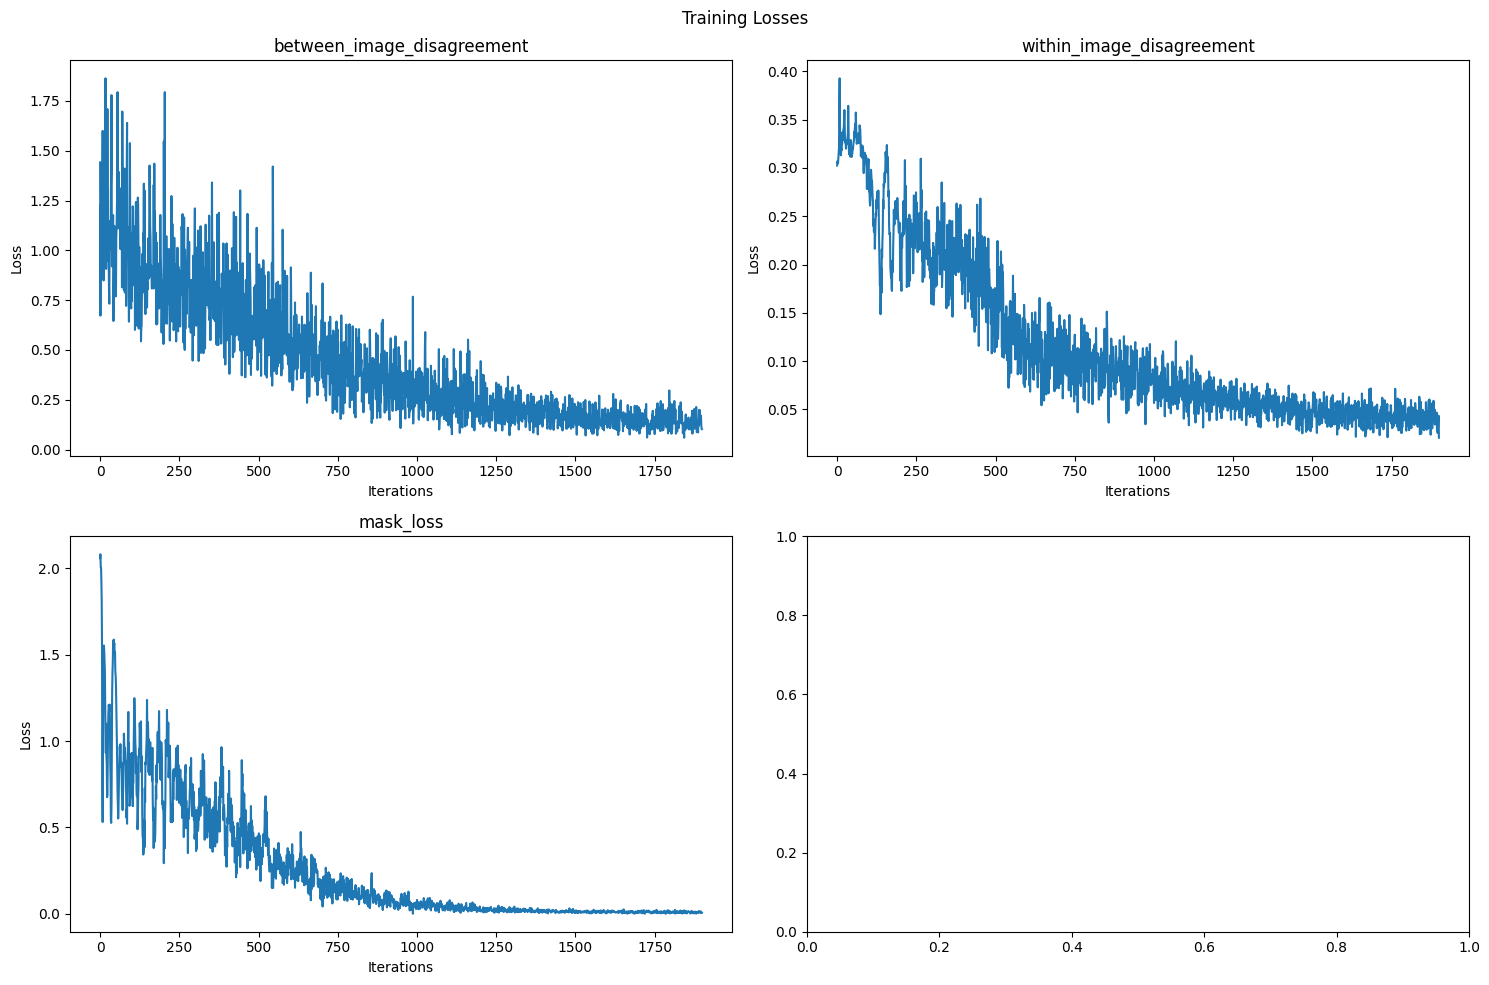

In [26]:
# lodestar2_CEM = LodeSTAR(num_classes=3, n_transforms=2).build()
# lodestar2_CEM = clip_grad_training(lodestar2_CEM, train_dataloader_CEM, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=False, clip_grad=False)

# lodestar2_CEM.plot_losses()

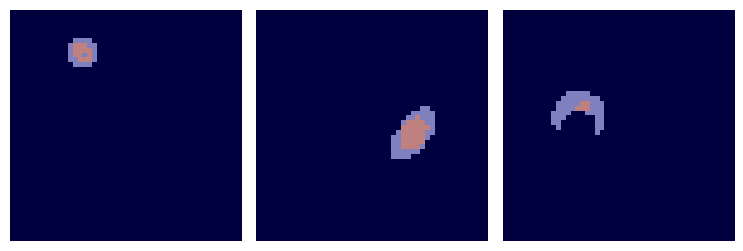

Class 1:
Jaccard Index: 0.3934
True positives %: 95%
False positives: 1.93
Class 2:
Jaccard Index: 0.4283
True positives %: 99%
False positives: 0.03
Class 3:
Jaccard Index: 0.1323
True positives %: 82%
False positives: 0.83


In [27]:
lodestar2_CEM.eval()
outputs_CEM = []
for batch in test_dataloader_CEM:
    data, *_ = batch
    output = lodestar2_CEM((data)).detach()
    outputs_CEM.append(output)

outputs_CEM = torch.cat(outputs_CEM, dim=0)

segmentation_tests(test_dataset_CEM, outputs_CEM)

### CES

In [81]:
# import deeplay as dl

# lodestar2_CES = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
# trainer_lodestar_CES = dl.Trainer(max_epochs=150, accelerator='cpu')
# trainer_lodestar_CES.fit(lodestar2_CES, train_dataloader_CES)

torch.save(lodestar2_CES.state_dict(), "models/lodestar2_CES.pth")

# lodestar2_CES = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
# lodestar2_CES.load_state_dict(torch.load('models/lodestar2_CES.pth'))
# lodestar2_CES.eval()

In [ ]:
# lodestar2_CES = LodeSTAR(num_classes=3, n_transforms=2).build()
# lodestar2_CES = clip_grad_training(lodestar2_CES, train_dataloader_CES, 
#                                            num_epochs=50, initial_lr=1e-3, patience=50, best_model=True, clip_grad=True)

# lodestar2_CES.plot_losses()

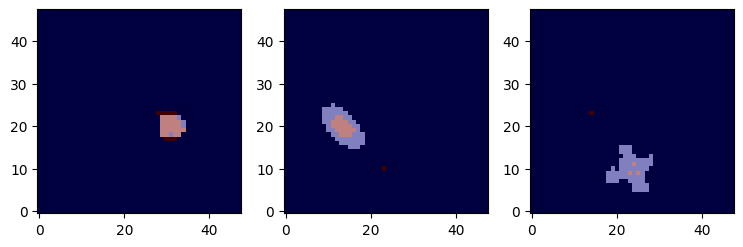

Class 1:
Jaccard Index: 0.6617
True positives %: 86%
False positives: 1.63
Class 2:
Jaccard Index: 0.3198
True positives %: 100%
False positives: 0.17
Class 3:
Jaccard Index: 0.0599
True positives %: 72%
False positives: 1.02


In [ ]:
lodestar2_CES.eval()
outputs_CES = []
for batch in test_dataloader_CES:
    data, *_ = batch
    output = lodestar2_CES((data)).detach()
    outputs_CES.append(output)

outputs_CES = torch.cat(outputs_CES, dim=0)

segmentation_tests(test_dataset_CES, outputs_CES)

### CEF

In [ ]:
# import deeplay as dl

# lodestar2_CEF = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
# trainer_lodestar_CEF = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CEF.fit(lodestar2_CEF, train_dataloader_CEF)

# torch.save(lodestar2_CEF.state_dict(), "models/lodestar2_CEF.pth")

lodestar2_CEF = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
lodestar2_CEF.load_state_dict(torch.load('models/lodestar2_CEF.pth'))
lodestar2_CEF.eval()

In [ ]:
# lodestar2_CEF = LodeSTAR(num_classes=3, n_transforms=2).build()
# trained_model = clip_grad_training(lodestar2_CEF, train_dataloader_CEF, 
#                                            num_epochs=50, initial_lr=1e-3, patience=10, best_model=True, clip_grad=False)

# trained_model.plot_losses()

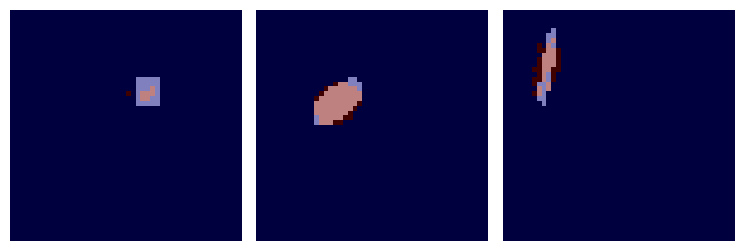

Class 1:
Jaccard Index: 0.2132
True positives %: 72%
False positives: 1.88
Class 2:
Jaccard Index: 0.7035
True positives %: 100%
False positives: 0.02
Class 3:
Jaccard Index: 0.4123
True positives %: 90%
False positives: 1.43


In [ ]:
lodestar2_CEF.eval()
outputs_CEF = []
for batch in test_dataloader_CEF:
    data, *_ = batch
    output = lodestar2_CEF((data)).detach()
    outputs_CEF.append(output)

outputs_CEF = torch.cat(outputs_CEF, dim=0)

segmentation_tests(test_dataset_CEF, outputs_CEF)

### CESq

In [126]:
# import deeplay as dl

# lodestar2_CESq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
# trainer_lodestar_CESq = dl.Trainer(max_epochs=50, accelerator='cpu')
# trainer_lodestar_CESq.fit(lodestar2_CESq, train_dataloader_CESq)

# torch.save(lodestar2_CESq.state_dict(), "models/lodestar2_CESq.pth") #77% E

lodestar2_CESq = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=3).build()
lodestar2_CESq.load_state_dict(torch.load('models/lodestar2_CESq.pth'))
lodestar2_CESq.eval()

LodeSTAR(
  (model): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): LazyConv2d(0, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (1): Conv2dBlock(
        (layer): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (2): Conv2dBlock(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (3-8): 6 x Conv2dBlock(
        (layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (9): Conv2dBlock(
        (layer): Conv2d(64, 7, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): Identity()
      )
    )
  )
  (between_loss): L1Loss()
  (within_loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.0001)
  (

In [127]:
# lodestar2_CESq = LodeSTAR(num_classes=3, n_transforms=2).build()
# trained_model = clip_grad_training(lodestar2_CESq, train_dataloader_CESq, 
#                                            num_epochs=39, initial_lr=1e-3, patience=5, best_model=False, clip_grad=True)

# trained_model.plot_losses()

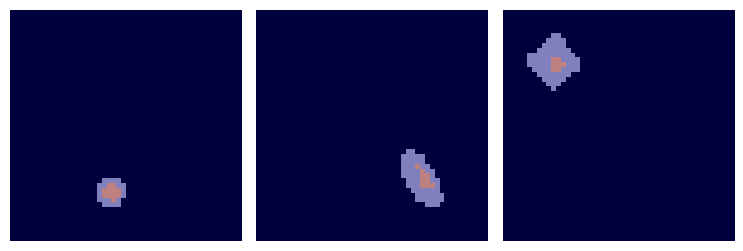

Class 1:
Jaccard Index: 0.4009
True positives %: 100%
False positives: 0.05
Class 2:
Jaccard Index: 0.1477
True positives %: 71%
False positives: 0.73
Class 3:
Jaccard Index: 0.0968
True positives %: 96%
False positives: 0.04


In [128]:
lodestar2_CESq.eval()
outputs_CESq = []
for batch in test_dataloader_CESq:
    data, *_ = batch
    output = lodestar2_CESq((data)).detach()
    outputs_CESq.append(output)

outputs_CESq = torch.cat(outputs_CESq, dim=0)

segmentation_tests(test_dataset_CESq, outputs_CESq)

## Dense dataset

In [ ]:
import deeplay as dl

# lodestar2_CE = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
# trainer_lodestar_CE = dl.Trainer(max_epochs=100, accelerator='cpu')
# trainer_lodestar_CE.fit(lodestar2_CE, train_dataloader_CE)

# torch.save(lodestar2_CE.state_dict(), "models/lodestar2_CE.pth")

lodestar2_CE = LodeSTAR(optimizer=dl.Adam(lr=1e-4), num_classes=2).build()
lodestar2_CE.load_state_dict(torch.load('models/lodestar2_CE.pth'))
lodestar2_CE.eval()

LodeSTAR(
  (model): ConvolutionalNeuralNetwork(
    (blocks): LayerList(
      (0): Conv2dBlock(
        (layer): LazyConv2d(0, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (1): Conv2dBlock(
        (layer): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (2): Conv2dBlock(
        (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (layer): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (3-8): 6 x Conv2dBlock(
        (layer): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU()
      )
      (9): Conv2dBlock(
        (layer): Conv2d(64, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): Identity()
      )
    )
  )
  (between_loss): L1Loss()
  (within_loss): L1Loss()
  (optimizer): Adam[Adam](lr=0.0001)
  (

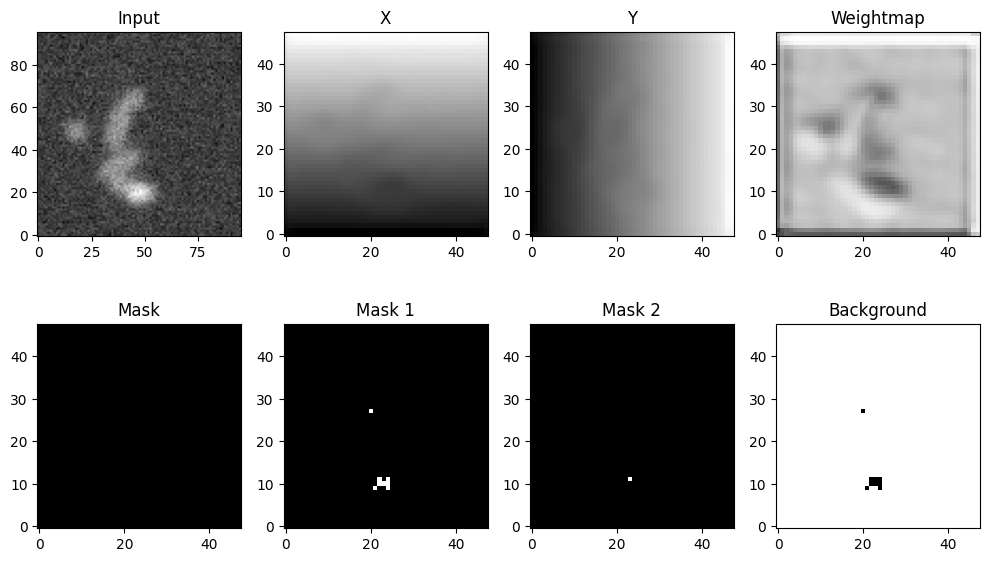

In [ ]:
lodestar2_CE.eval()
data, *_ = next(iter(test_dataloader_CE_d))
output = lodestar2_CE((data)).detach()
import matplotlib.pyplot as plt

x = 5

plt.figure(figsize=(10, 6))
for i in range(8):
	plt.subplot(2, 4, i + 1)
	if i==0:
		plt.imshow(data[x,...].squeeze(), cmap="gray", origin="lower")
		plt.title('Input')
	elif i==1:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower")
		plt.title('X')
	elif i==2:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower")
		plt.title('Y')
	elif i==3:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower", vmin=0,vmax=1)
		plt.title('Weightmap')
	elif i==4:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower")
		plt.title('Mask')
	else:
		plt.imshow(output[x,i-1,...], cmap="gray", origin="lower", vmin=0,vmax=1)
		if i < 7:
			plt.title('Mask ' + str(i-4))
		else:
			plt.title('Background')
plt.tight_layout()
plt.show()

In [ ]:
outputs_CE = []
for batch in test_dataloader_CE_d:
    data, *_ = batch
    output = lodestar2_CE((data)).detach()
    outputs_CE.append(output)

outputs_CE = torch.cat(outputs_CE, dim=0)

segmentation_tests(test_dataset_CE_d, outputs_CE)

IndexError: tuple index out of range

## Plots multiple runs

C:\Users\alons\AppData\Local\Temp\ipykernel_8552\2867761877.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Jaccard adj', data=df, width=0.5, palette=colors)


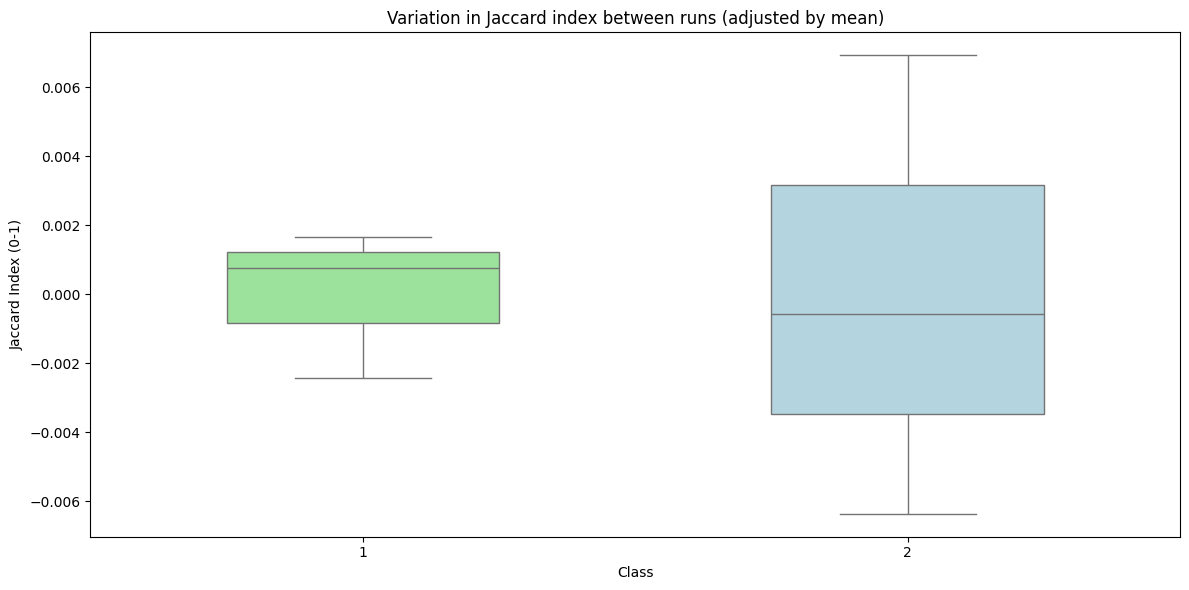

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('data_CE_runs.xlsx')

# Get unique classes
classes = df['Class'].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Define colors for each class
colors = ['lightgreen', 'lightblue']  # You can change these colors as desired

# Create boxplot with different colors for each class
sns.boxplot(x='Class', y='Jaccard adj', data=df, width=0.5, palette=colors)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('Jaccard Index (0-1)')
plt.title('Variation in Jaccard index between runs (adjusted by mean)')
plt.xticks(rotation=0)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

C:\Users\alons\AppData\Local\Temp\ipykernel_8552\658919071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='True positives adj', data=df, width=0.5, palette=colors)


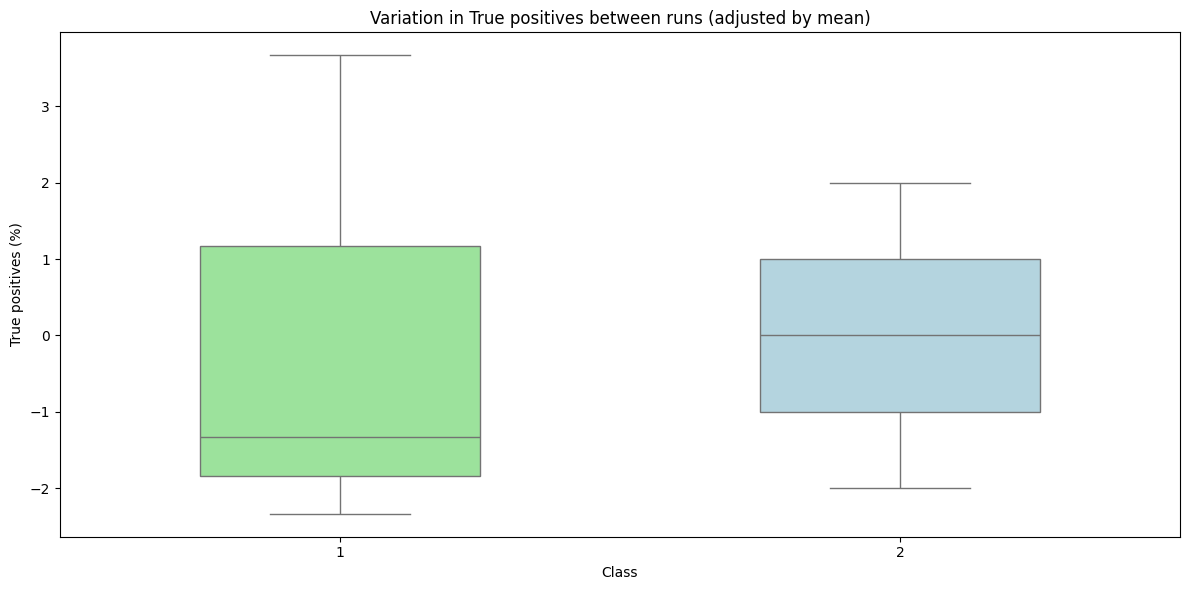

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('data_CE_runs.xlsx')

# Get unique classes
classes = df['Class'].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Define colors for each class
colors = ['lightgreen', 'lightblue']  # You can change these colors as desired

# Create boxplot with different colors for each class
sns.boxplot(x='Class', y='True positives adj', data=df, width=0.5, palette=colors)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('True positives (%)')
plt.title('Variation in True positives between runs (adjusted by mean)')
plt.xticks(rotation=0)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


C:\Users\alons\AppData\Local\Temp\ipykernel_8552\1403204456.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='False positives adj', data=df, width=0.5, palette=colors)


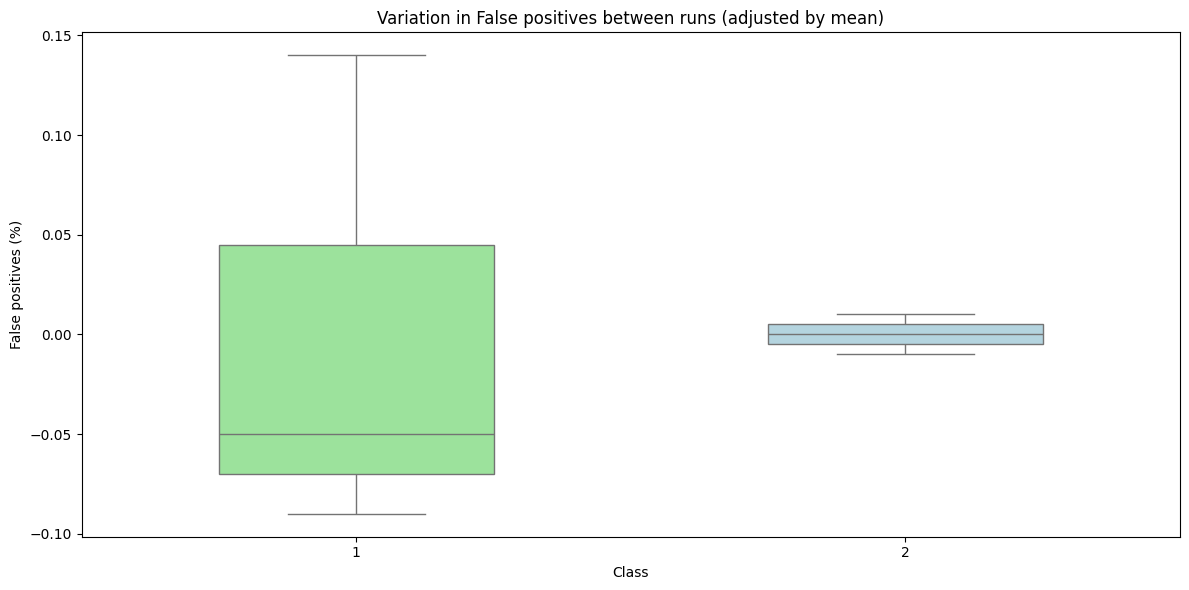

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel('data_CE_runs.xlsx')

# Get unique classes
classes = df['Class'].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Define colors for each class
colors = ['lightgreen', 'lightblue']  # You can change these colors as desired

# Create boxplot with different colors for each class
sns.boxplot(x='Class', y='False positives adj', data=df, width=0.5, palette=colors)

# Customize the plot
plt.xlabel('Class')
plt.ylabel('False positives (%)')
plt.title('Variation in False positives between runs (adjusted by mean)')
plt.xticks(rotation=0)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## Plots segmentation

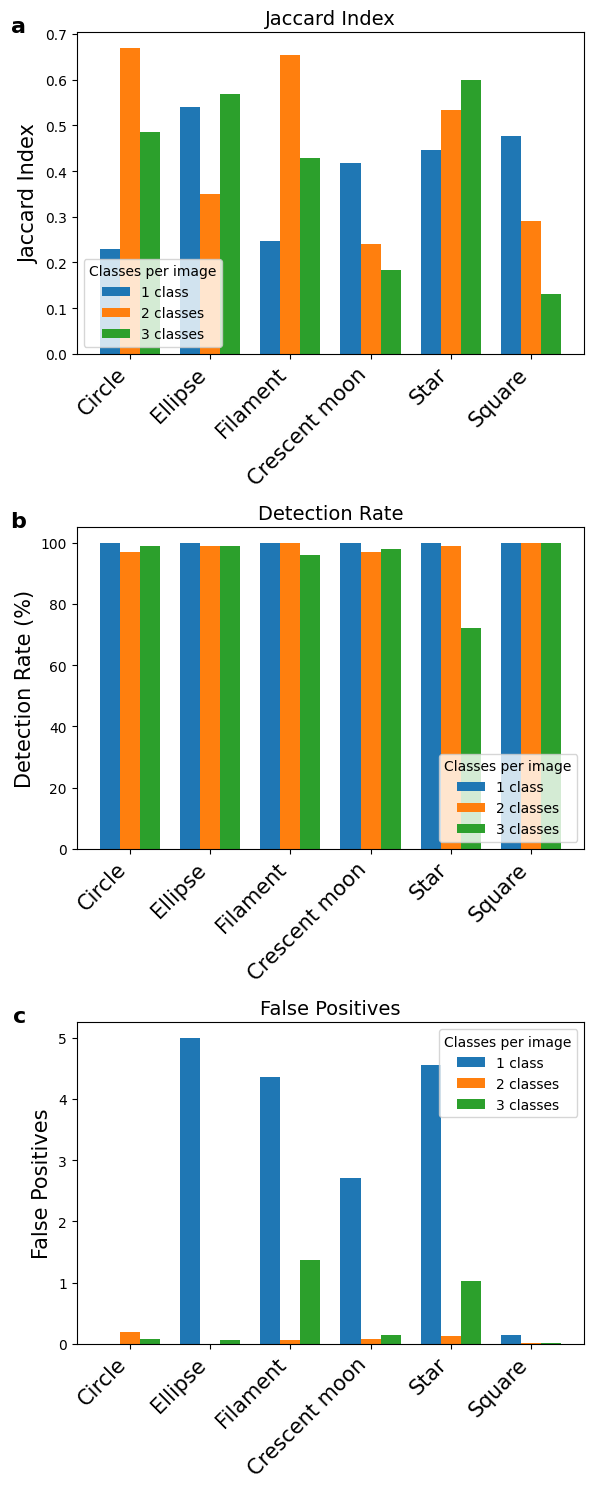

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
particles = ["Circle", "Ellipse", "Filament", "Crescent moon", "Star", "Square"]
classes = ["1 class", "2 classes", "3 classes"]

# Jaccard index data
jaccard_index = [
    [0.23, 0.67, 0.486],  # Circle
    [0.541, 0.349, 0.568],  # Ellipse
    [0.246, 0.654, 0.428],  # Filament
    [0.418, 0.24, 0.183],  # Crescent moon
    [0.446, 0.534, 0.599],  # Star
    [0.477, 0.291, 0.13]  # Square
]

# Detection rate data
detection_rate = [
    [100, 97, 99],  # Circle
    [100, 99, 99],  # Ellipse
    [100, 100, 96],  # Filament
    [100, 97, 98],  # Crescent moon
    [100, 99, 72],  # Star
    [100, 100, 100]  # Square
]

# False positives data
false_positives = [
    [0, 0.19, 0.08],  # Circle
    [5, 0, 0.06],  # Ellipse
    [4.36, 0.057, 1.36],  # Filament
    [2.71, 0.07, 0.15],  # Crescent moon
    [4.55, 0.13, 1.02],  # Star
    [0.15, 0.01, 0.02]  # Square
]

# Convert data to numpy arrays for easier manipulation
jaccard_index = np.array(jaccard_index)
detection_rate = np.array(detection_rate)
false_positives = np.array(false_positives)

# Set up the bar positions
bar_width = 0.25
x = np.arange(len(particles))

# Create the grid of plots (3 rows, 1 column)
fig, axes = plt.subplots(3, 1, figsize=(6, 15))

# Plot for Jaccard Index
for i in range(len(classes)):
    axes[0].bar(x + i * bar_width, jaccard_index[:, i], width=bar_width, label=classes[i])
axes[0].set_title('Jaccard Index', fontsize=14)
axes[0].set_xticks(x + bar_width)
axes[0].set_xticklabels(particles, rotation=45, ha='right', fontsize=15)
axes[0].set_ylabel('Jaccard Index', fontsize=15)
axes[0].legend(title="Classes per image", loc='lower left')

# Plot for Detection Rate
for i in range(len(classes)):
    axes[1].bar(x + i * bar_width, detection_rate[:, i], width=bar_width, label=classes[i])
axes[1].set_title('Detection Rate', fontsize=14)
axes[1].set_xticks(x + bar_width)
axes[1].set_xticklabels(particles, rotation=45, ha='right', fontsize=15)
axes[1].set_ylabel('Detection Rate (%)', fontsize=15)
axes[1].legend(title="Classes per image", loc='lower right')

# Plot for False Positives
for i in range(len(classes)):
    axes[2].bar(x + i * bar_width, false_positives[:, i], width=bar_width, label=classes[i])
axes[2].set_title('False Positives', fontsize=14)
axes[2].set_xticks(x + bar_width)
axes[2].set_xticklabels(particles, rotation=45, ha='right', fontsize=15)
axes[2].set_ylabel('False Positives', fontsize=15)
axes[2].legend(title="Classes per image")

# Add 'a', 'b', and 'c' to the top left corner of each subplot
axes[0].text(-0.1, 1.05, 'a', transform=axes[0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
axes[1].text(-0.1, 1.05, 'b', transform=axes[1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
axes[2].text(-0.1, 1.05, 'c', transform=axes[2].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')


# Adjust layout and show the plot
plt.tight_layout()
plt.show()